### Q1. List any five functions of the pandas library with execution.

* read_csv(): This function is used to read a CSV (comma-separated values) file into a Pandas DataFrame.


* groupby(): This function is used to group the data in a DataFrame based on one or more columns and apply some aggregate function on the groups.


* fillna(): This function is used to replace missing values in the DataFrame with a specified value or with values computed from other columns.


* pivot_table(): This function is used to create a spreadsheet-style pivot table as a DataFrame.


* plot(): This function is used to plot the data in a DataFrame using various plot types.

---------------------
   year category  value
0  2018        A     10
1  2019        B     20
2  2020        C     30
3  2021        A     40
---------------------
category
A    25.0
B    20.0
C    30.0
Name: value, dtype: float64
---------------------
          A    B   C
0  1.000000  5.0   9
1  2.000000  6.5  10
2  2.333333  6.5  11
3  4.000000  8.0  12
---------------------


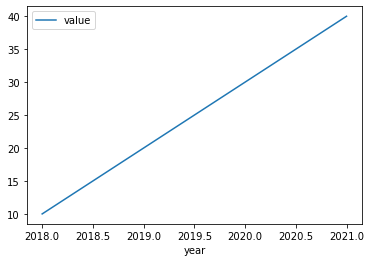

---------------------
year      2018  2019  2020  2021
category                        
A         10.0   NaN   NaN  40.0
B          NaN  20.0   NaN   NaN
C          NaN   NaN  30.0   NaN


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create a DataFrame
df = pd.DataFrame({'year': [2018, 2019, 2020, 2021], 'category': ['A', 'B', 'C', 'A'], 'value': [10, 20, 30, 40]})

# Write the DataFrame to a CSV file
df.to_csv('data.csv', index=False)


# 1.
print('---------------------')
df = pd.read_csv('data.csv')
print(df.head())


# 2.
print('---------------------')
grouped = df.groupby('category')['value'].mean()
print(grouped)


# 3.
print('---------------------')
df = pd.DataFrame({'A': [1, 2, np.nan, 4], 'B': [5, np.nan, np.nan, 8], 'C': [9, 10, 11, 12]})
df.fillna(df.mean(), inplace=True)
print(df)


# 4.
print('---------------------')
df = pd.read_csv('data.csv')
df.plot(kind='line', x='year', y='value')
plt.show()


# 5.
print('---------------------')
df = pd.read_csv('data.csv')
pivot = pd.pivot_table(df, values='value', index='category', columns='year')
print(pivot)

### Q2. Given a Pandas DataFrame df with columns 'A', 'B', and 'C', write a Python function to re-index the DataFrame with a new index that starts from 1 and increments by 2 for each row.

In [16]:
import pandas as pd
import math

def reindex_df(df):
    # Get the number of rows in the DataFrame
    n_rows = df.shape[0]

    # Create a new index that starts from 1 and increments by 2 for each row
    new_index = pd.RangeIndex(start=1, stop=math.ceil(n_rows/2)+2, step=2)

    # Re-index the DataFrame with the new index
    df = df.reindex(new_index)

    # Return the re-indexed DataFrame
    return df


In [20]:
# Create a sample DataFrame
df = pd.DataFrame({'A': [1, 2, 3, 4, 5, 6, 7], 'B': [5, 6, 7, 8, 9, 10, 11], 'C': [9, 10, 11, 12, 13, 14, 15]})
print(df)
# Re-index the DataFrame with a new index that starts from 1 and increments by 2 for each row
df = reindex_df(df)
print('\n')
# Print the re-indexed DataFrame
print('re-indexed df')
print(df)

   A   B   C
0  1   5   9
1  2   6  10
2  3   7  11
3  4   8  12
4  5   9  13
5  6  10  14
6  7  11  15


re-indexed df
   A   B   C
1  2   6  10
3  4   8  12
5  6  10  14


### Q3. You have a Pandas DataFrame df with a column named 'Values'. Write a Python function that iterates over the DataFrame and calculates the sum of the first three values in the 'Values' column. The function should print the sum to the console. For example, if the 'Values' column of df contains the values [10, 20, 30, 40, 50], your function should calculate and print the sum of the first three values, which is 60.

In [21]:
import pandas as pd

def sum_first_three(df):
    first_three_sum = df.loc[0:2, 'Values'].sum()
    print("Sum of first three values in 'Values' column: {}".format(first_three_sum))

In [23]:
# Create a sample DataFrame
df = pd.DataFrame({'Values': [20, 30, 40, 50, 60]})

# Call the sum_first_three() function
sum_first_three(df)


Sum of first three values in 'Values' column: 90


### Q4. Given a Pandas DataFrame df with a column 'Text', write a Python function to create a new column 'Word_Count' that contains the number of words in each row of the 'Text' column.


In [25]:
import pandas as pd

def add_word_count_column(df):
    """
    This function takes a Pandas DataFrame with a column 'Text' and creates a new
    column 'Word_Count' that contains the number of words in each row of the 'Text'
    column.
    """
    # Split each row of the 'Text' column into a list of words
    words_list = df['Text'].str.split()

    # Count the number of words in each row and create a new column 'Word_Count'
    df['Word_Count'] = words_list.apply(len)
    
    # Return the modified DataFrame
    return df


In [27]:
# Create a sample DataFrame
df = pd.DataFrame({'Text': ['This is a sentence', 'This is another short sentence', 'And a third and final sentence']})

# Call the add_word_count_column() function
df = add_word_count_column(df)

# Print the modified DataFrame
print(df)


                             Text  Word_Count
0              This is a sentence           4
1  This is another short sentence           5
2  And a third and final sentence           6


### Q5. How are DataFrame.size() and DataFrame.shape() different?


DataFrame.size returns the total number of elements in the DataFrame, which is equal to the product of the number of rows and the number of columns. It does not provide any information about the shape of the DataFrame.

DataFrame.shape returns a tuple containing the number of rows and columns in the DataFrame. Specifically, it returns the shape of the DataFrame in the form (number of rows, number of columns). This can be useful for understanding the structure of the DataFrame and for indexing and selecting data.

In [28]:
import pandas as pd

# Create a sample DataFrame
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})

# Print the size and shape of the DataFrame
print("DataFrame size: {}".format(df.size))
print("DataFrame shape: {}".format(df.shape))

DataFrame size: 6
DataFrame shape: (3, 2)


### Q6. Which function of pandas do we use to read an excel file?


to read a excel file in python we use:
**pandas.read_excel(filename)**

### Q7. You have a Pandas DataFrame df that contains a column named 'Email' that contains email addresses in the format 'username@domain.com'. Write a Python function that creates a new column 'Username' in df that contains only the username part of each email address. The username is the part of the email address that appears before the '@' symbol. For example, if the email address is 'john.doe@example.com', the 'Username' column should contain 'john.doe'. Your function should extract the username from each email address and store it in the new 'Username' column.

In [29]:
import pandas as pd

def extract_username(df):
    # Use str.split() to split the email addresses at the '@' symbol and extract the username
    df['Username'] = df['Email'].str.split('@').str[0]
    
    # Return the updated DataFrame
    return df

In [30]:
# Create a sample DataFrame
data = {'Email': ['john.doe@example.com', 'jane.smith@example.com', 'bob.johnson@example.com']}
df = pd.DataFrame(data)

# Call the extract_username() function to extract the usernames
df = extract_username(df)

# Print the updated DataFrame
print(df)

                     Email     Username
0     john.doe@example.com     john.doe
1   jane.smith@example.com   jane.smith
2  bob.johnson@example.com  bob.johnson


### Q8. You have a Pandas DataFrame df with columns 'A', 'B', and 'C'. Write a Python function that selects all rows where the value in column 'A' is greater than 5 and the value in column 'B' is less than 10. The function should return a new DataFrame that contains only the selected rows. For example, if df contains the following values:
###  i A B C
### 0 3 5 1
### 1 8 2 7
### 2 6 9 4
### 3 2 3 5
### 4 9 1 2
### Your function should select the following rows: A B C
### 1 8 2 7
### 4 9 1 2
### The function should return a new DataFrame that contains only the selected rows.

In [ ]:
def sel_rows(df):
    df['A']

In [41]:
import pandas as pd
data = {'A': [3, 8, 6, 2, 9], 
        'B': [5, 2, 9, 3, 1], 
        'C': [1, 7, 4, 5, 2]}
df = pd.DataFrame(data)

### Q9. Given a Pandas DataFrame df with a column 'Values', write a Python function to calculate the mean,median, and standard deviation of the values in the 'Values' column.

In [42]:
import pandas as pd

def calculate_stats(df):
    mean = df['Values'].mean()
    median = df['Values'].median()
    std_dev = df['Values'].std()
    
    print("Mean:", mean)
    print("Median:", median)
    print("Standard deviation:", std_dev)

In [44]:
df = pd.DataFrame({'Values': [10, 20, 30, 40, 100]})
calculate_stats(df)

Mean: 40.0
Median: 30.0
Standard deviation: 35.35533905932738


### Q10. Given a Pandas DataFrame df with a column 'Sales' and a column 'Date', write a Python function to create a new column 'MovingAverage' that contains the moving average of the sales for the past 7 days for each row in the DataFrame. The moving average should be calculated using a window of size 7 and should include the current day.

In [50]:
import pandas as pd

def add_moving_average(df):
    df['MovingAverage'] = df['Sales'].rolling(window=7, min_periods=1).mean()
    return df

In [51]:
df = pd.DataFrame({'Date': pd.date_range(start='2022-01-01', end='2022-01-31')})
df['Sales'] = [10, 20, 15, 30, 25, 35, 40, 20, 25, 30, 35, 45, 50, 40, 35, 30, 25, 20, 15, 10, 5, 10, 20, 30, 40, 45, 50, 55, 60, 70, 80]
# print(df)
df = add_moving_average(df)
print(df)

         Date  Sales  MovingAverage
0  2022-01-01     10      10.000000
1  2022-01-02     20      15.000000
2  2022-01-03     15      15.000000
3  2022-01-04     30      18.750000
4  2022-01-05     25      20.000000
5  2022-01-06     35      22.500000
6  2022-01-07     40      25.000000
7  2022-01-08     20      26.428571
8  2022-01-09     25      27.142857
9  2022-01-10     30      29.285714
10 2022-01-11     35      30.000000
11 2022-01-12     45      32.857143
12 2022-01-13     50      35.000000
13 2022-01-14     40      35.000000
14 2022-01-15     35      37.142857
15 2022-01-16     30      37.857143
16 2022-01-17     25      37.142857
17 2022-01-18     20      35.000000
18 2022-01-19     15      30.714286
19 2022-01-20     10      25.000000
20 2022-01-21      5      20.000000
21 2022-01-22     10      16.428571
22 2022-01-23     20      15.000000
23 2022-01-24     30      15.714286
24 2022-01-25     40      18.571429
25 2022-01-26     45      22.857143
26 2022-01-27     50      28

### Q11. You have a Pandas DataFrame df with a column 'Date'. Write a Python function that creates a new column 'Weekday' in the DataFrame. The 'Weekday' column should contain the weekday name (e.g. Monday, Tuesday) corresponding to each date in the 'Date' column.
### For example, if df contains the following values:
### Date
### 0 2023-01-01
### 1 2023-01-02
### 2 2023-01-03
### 3 2023-01-04
### 4 2023-01-05
### Your function should create the following DataFrame:

### Date Weekday
### 0 2023-01-01 Sunday
### 1 2023-01-02 Monday
### 2 2023-01-03 Tuesday
### 3 2023-01-04 Wednesday
### 4 2023-01-05 Thursday
### The function should return the modified DataFrame.

In [56]:
import pandas as pd

def add_weekday_column(df):
    df['Weekday'] = pd.to_datetime(df['Date']).dt.day_name()
    return df

In [57]:
import pandas as pd

# create a sample DataFrame
data = {'Date': ['2022-04-10', '2022-04-11', '2022-04-12', '2022-04-13', '2022-04-14']}
df = pd.DataFrame(data)

# add a weekday column to the DataFrame
df = add_weekday_column(df)

# print the updated DataFrame
print(df)

         Date    Weekday
0  2022-04-10     Sunday
1  2022-04-11     Monday
2  2022-04-12    Tuesday
3  2022-04-13  Wednesday
4  2022-04-14   Thursday


### Q12. Given a Pandas DataFrame df with a column 'Date' that contains timestamps, write a Python function to select all rows where the date is between '2023-01-01' and '2023-01-31'.

In [88]:
def select_between_date(df):
    selected = (df['Date'] >= '2023-01-01') & (df['Date'] <= '2023-01-31')
    new_df = df.loc[selected]
    print(new_df)

In [97]:
import pandas as pd

date_index = pd.date_range(start='2023-01-01', end='2023-02-28')

df = pd.DataFrame({'Date': date_index})
select_between_date(df)

         Date
0  2023-01-01
1  2023-01-02
2  2023-01-03
3  2023-01-04
4  2023-01-05
5  2023-01-06
6  2023-01-07
7  2023-01-08
8  2023-01-09
9  2023-01-10
10 2023-01-11
11 2023-01-12
12 2023-01-13
13 2023-01-14
14 2023-01-15
15 2023-01-16
16 2023-01-17
17 2023-01-18
18 2023-01-19
19 2023-01-20
20 2023-01-21
21 2023-01-22
22 2023-01-23
23 2023-01-24
24 2023-01-25
25 2023-01-26
26 2023-01-27
27 2023-01-28
28 2023-01-29
29 2023-01-30
30 2023-01-31


### Q13. To use the basic functions of pandas, what is the first and foremost necessary library that needs to be imported?

In [100]:
# To use the basic function of pandas the first thing to import is "pandas" library
# syntax:
import pandas as pd